In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
coord_file = r"C:\Users\issah\Downloads\BradyHotspring\Brady hotspring\Surface_DAS_DTS_UTM_coordinates.csv"


# with open(coord_file, mode ='r')as file:
#   csvFile = csv.reader(file)
#   for lines in csvFile:
#         print(lines)

In [5]:
df = pd.read_csv(coord_file)
df.head()

,Channel,X,Y,Z
0,number,UTM [m],UTM [m],UTM [m]
1,-20,0,0,0
2,-19,0,0,0
3,-18,0,0,0
4,-17,0,0,0


C:\Users\issah\AppData\Local\Temp\ipykernel_29828\2064842434.py:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=5)


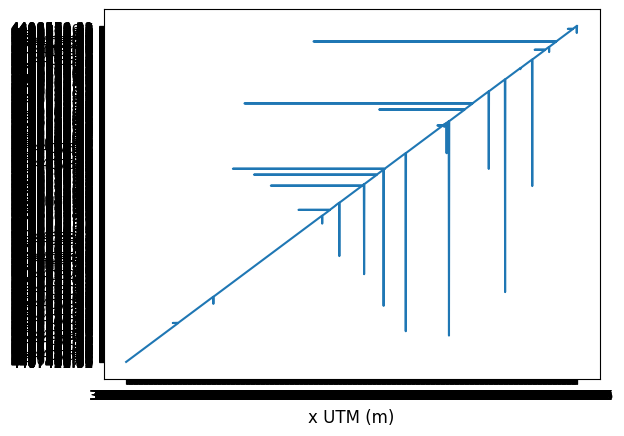

In [28]:
# plt.plot(df['X'][1:])
# N = len(df)
N = 8673
ind = np.arange(53, N, 5)
x = np.array(df.iloc[ind]["X"])
y = np.array(df.iloc[ind]["Y"])
z = np.array(df.iloc[ind]["Z"])
channel = np.array(df.iloc[ind]["Channel"])
n = len(x)
plt.plot(x[:n], y[:n])
plt.xlabel("x UTM (m)", fontsize=12)
plt.locator_params(axis="x", nbins=5)

In [38]:
x.astype(float)
y.astype(float)
ch = [int(i) for i in channel]

In [41]:
# geomData = 'Surface_DAS_DTS_UTM_coordinates.csv'
# For this experiment,  some of the geometry is in this csv file.
# if you look in the CSV file, these are the first and last rows with channels that have a location assigned
minRow = 53
maxRow = 8673
# read the geometry of all channels in the CSV file
with open(coord_file) as myFile:
    myReader = csv.reader(myFile, delimiter=",")
    nRows = maxRow - minRow + 1
    ch = np.zeros(nRows, dtype=int)  # array to hold channel indices
    x = np.zeros(nRows, dtype=np.float32)  # array to hold x location
    y = np.zeros(nRows, dtype=np.float32)  # array to hold y location
    myFile.seek(0)
    rowCtr = 1
    for row in myReader:
        if (rowCtr >= minRow) and (rowCtr <= maxRow):
            ch[rowCtr - minRow] = int(row[0])
            x[rowCtr - minRow] = float(row[1])
            y[rowCtr - minRow] = float(row[2])
        rowCtr = rowCtr + 1

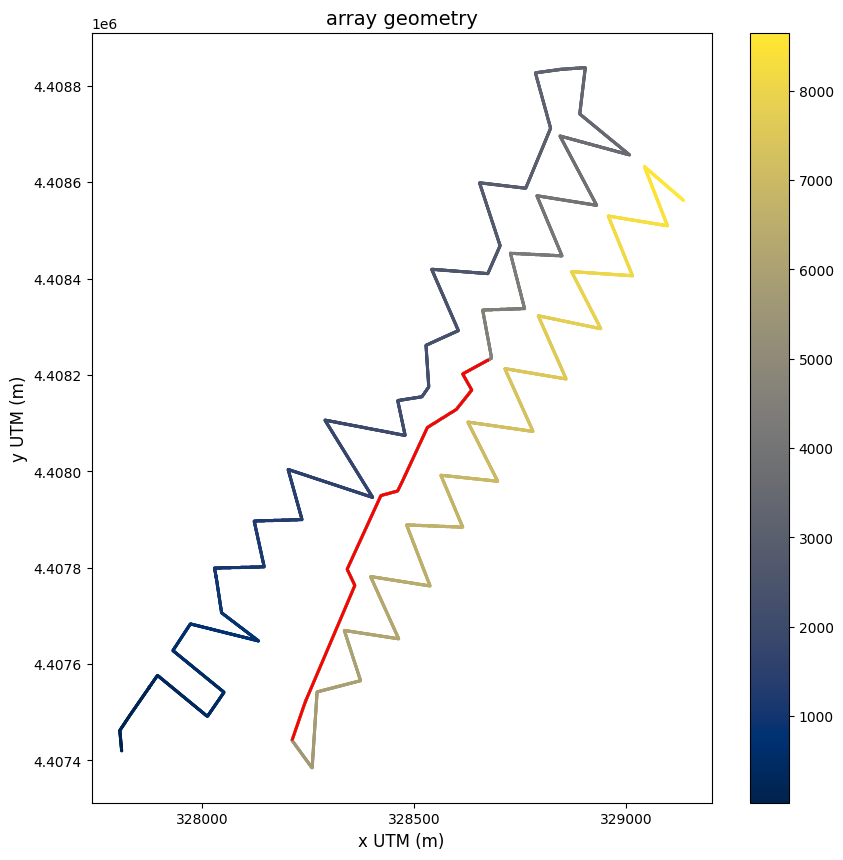

In [61]:
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=ch, linewidth=0, s=5, cmap=plt.get_cmap("cividis"))
plt.colorbar()
plt.xlabel("x UTM (m)", fontsize=12)
plt.locator_params(
    axis="x", nbins=5
)  # reduce number of tick marks so labels aren't so crowded
plt.ylabel("y UTM (m)", fontsize=12)
plt.title("array geometry", fontsize=14)
start_ch = 4600
nchannels = 1000
i = np.where(ch == start_ch)[0][0]
plt.plot(x[i : i + nchannels], y[i : i + nchannels], "r", linewidth=2)
# plt.scatter(x,y,c='k',linewidth=0)
# plt.scatter(srcX,srcY,c='k',linewidth=0)

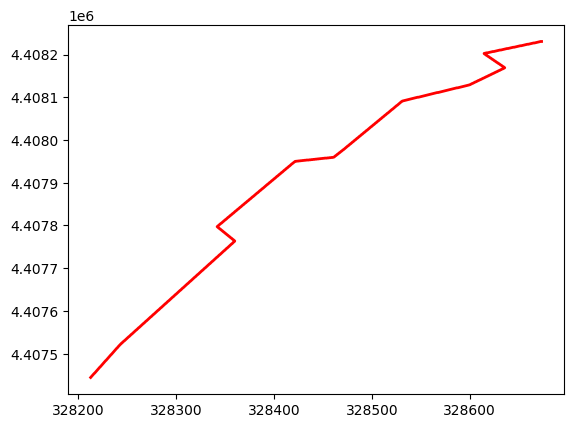

In [60]:
start_ch = 4600
nchannels = 1000
i = np.where(ch == start_ch)[0][0]
plt.plot(x[i : i + nchannels], y[i : i + nchannels], "r", linewidth=2)